In [ ]:
# Practica 6
# Autor: Jaime del Rey, Grupo 24

In [2]:
import codecs
import pandas as p
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
from scipy.io import loadmat
from process_email import email2TokenList
from get_vocab_dict import getVocabDict

In [3]:
def plot_decision_boundary(X,clf):
    x1_min, x1_max = X[:, 0].min(), X[:, 0].max()    
    x2_min, x2_max = X[:, 1].min(), X[:, 1].max()    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max,0.002),np.arange(x2_min, x2_max,0.002))
    
    z = clf.predict(np.c_[xx1.ravel(), xx2.ravel()])
    z = z.reshape(xx1.shape)
    
    plt.contour(xx1, xx2, z, [0.5], linewidths=1, colors='b')
    
def process_emails(emails):
    processed = []
    
    for e in emails:
        content = codecs.open(e,'r',encoding='utf-8', errors='ignore').read()
        processed.append(email2TokenList(content))
    
    voc = getVocabDict()
    ret = np.zeros((len(processed),len(voc)+1))
    
    for i, email in enumerate(processed):
        for j,w in enumerate(email):
            if w in voc: 
                ret[i][voc[w]] = 1 
    return ret   

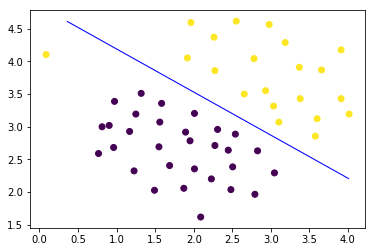

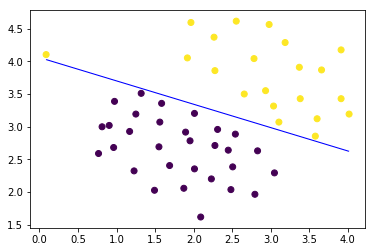

In [4]:
#Kernel lineal

data = loadmat('ex6data1.mat')

X = data['X']
y = data['y'].ravel()

svm1 = sk.svm.SVC(kernel = 'linear', C = 1.0)
res1 = svm1.fit(X,y)

svm100 = sk.svm.SVC(kernel = 'linear', C = 100.0)
res100 = svm100.fit(X,y)

plt.figure()
plt.clf()
plt.scatter(X[:,0],X[:,1],c=y)
plot_decision_boundary(X,res1)
plt.show()

plt.figure()
plt.clf()
plt.scatter(X[:,0],X[:,1],c=y)
plot_decision_boundary(X,res100)
plt.show()

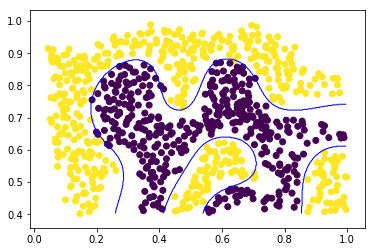

In [5]:
#Kernel gaussiano

data = loadmat('ex6data2.mat')

X = data['X']
y = data['y'].ravel()
C = 1.0
sigma = 0.1

svmG = sk.svm.SVC(kernel = 'rbf', C = C, gamma=1 / (2*sigma**2))
resG = svmG.fit(X,y)

plt.figure()
plt.scatter(X[:,0],X[:,1],c=y)
plot_decision_boundary(X,resG)
plt.show()

1
0.1
0.965


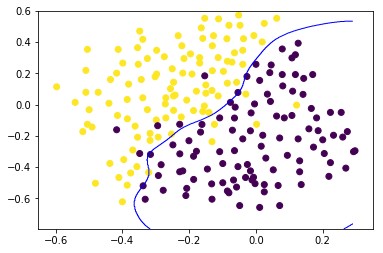

In [6]:
#Eleccion de parametros C y sigma
data = loadmat('ex6data3.mat')

X = data['X']
y = data['y'].ravel()
xval = data['Xval']
yval = data['yval'].ravel()

accres = 0 #final accuracy
Clist = [0.01,0.03,0.1,0.3,1,3,10,30]
Slist = [0.01,0.03,0.1,0.3,1,3,10,30]

for c in Clist:
    for s in Slist:
        svmG = sk.svm.SVC(kernel = 'rbf', C = c, gamma=1 / (2*s**2))
        G = svmG.fit(X,y)
        z = G.predict(xval)
        acc = (np.sum(z == yval)/len(yval))     
        if acc > accres:
            accres = acc
            Cres = c
            Sres = s
            resG = G

print(Cres) 
print(Sres)  
print(accres)
            
plt.figure()
plt.scatter(X[:,0],X[:,1],c=y)
plot_decision_boundary(xval,resG)
plt.show()

In [7]:
#Deteccion de Spam
import glob

#Get all the files
spamfiles = [f for f in glob.glob("spam/*", recursive=True)]
easyhamfiles = [f for f in glob.glob("easy_ham/*", recursive=True)]
hardhamfiles = [f for f in glob.glob("hard_ham/*", recursive=True)]

#Process emails
spam = process_emails(spamfiles)
easyham = process_emails(easyhamfiles)
hardham = process_emails(hardhamfiles)

print(np.shape(spam),np.shape(easyham),np.shape(hardham))

yspam = np.ones(np.shape(spam)[0])
yeasyham = np.zeros(np.shape(easyham)[0])
yhardham = np.zeros(np.shape(hardham)[0])


(500, 1900) (2551, 1900) (250, 1900)


In [10]:
#Train the model
accres = 0
for c in Clist:
    for s in Slist:
        svm_model = sk.svm.SVC(kernel = 'rbf', C = c, gamma=1 / (2*s**2))
        spam_classifier = svm_model.fit(np.vstack((spam[:100],easyham[:100],hardham[:100])),np.hstack((yspam[:100],yeasyham[:100],yhardham[:100])))
        out = spam_classifier.predict(np.vstack((spam[101:200],easyham[101:200],hardham[101:200])))
        acc = (np.sum(out == np.hstack((yspam[101:200],yeasyham[101:200],yhardham[101:200]))))/len(np.hstack((yspam[101:200],yeasyham[101:200],yhardham[101:200])))  
        if acc > accres:
            accres = acc
            Cres = c
            Sres = s
            resG = G
print("C: ",Cres) 
print("Sigma: ", Sres)  
print("Accuracy: ", accres)

C:  3
Sigma:  30
Accuracy:  0.9124579124579124
